In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 15 14:36:00 2018

@author: sahely
"""

#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 15 14:15:34 2018

SUPPORT VECTOR MACHINES
Import required packages

@author: Anish MM
"""
# For math.
import numpy as np
# For plotting.
import matplotlib.pyplot as plt
# for svm.
from sklearn import svm
# Iris dataset (a dataset we will work with).

In [2]:
#Ignore the following cell
#The following cell is used for plotting. Not related to our topic. Copy this for now. You can work it out once you have a better feel for python.

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

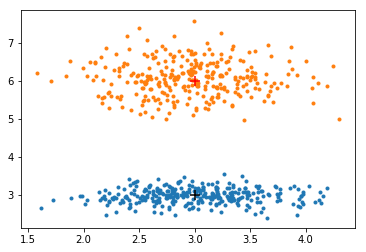

In [3]:
#Section 1 : A linearly separable dataset
#We will sample points from 2 gaussian distributions. One with mean at (3,3) and another with mean at (3,6).

# Cluster 1.
np.random.seed(0)

X11 = np.random.normal(3, 0.5, 300)
X12 = np.random.normal(3, 0.2, 300)
plt.scatter(X11, X12, marker='.')
# mark the mean.
plt.scatter(3, 3, s = 120, marker='+', color='black')


# Cluster 2.
X21 = np.random.normal(3, 0.5, 300)
X22 = np.random.normal(6, 0.5, 300)
plt.scatter(X21, X22, marker='.')
# mark the mean.
plt.scatter(3, 6, s = 120, marker='+', color='red')

plt.show()

shape of X1 =  (300, 2) , shape of X2 = (300, 2)
shape of X =  (600, 2)
shape of Y =  (600,)


[]

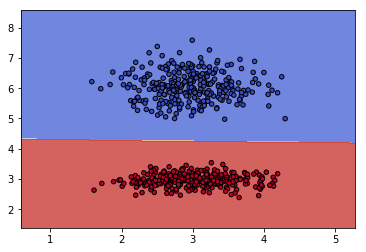

In [4]:
# Generate labels for the two clusters. cluster 1 label +1, cluster 2 label -1.
Y1 = [1 for i in range(len(X11))]
Y2 = [-1 for i in range(len(X21))]

# concatenate the two sets of labels
Y = Y1 + Y2 
Y = np.asarray(Y)
# Concatenate the feature vectors
X1 = np.column_stack((X11, X12))
X2 = np.column_stack((X21, X22))
print('shape of X1 = ', X1.shape, ', shape of X2 =', X2.shape)
X = np.append(X1, X2, axis=0)
print('shape of X = ', X.shape)
print('shape of Y = ', Y.shape)
#shape of X1 =  (300, 2) , shape of X2 = (300, 2)
#shape of X =  (600, 2)
#shape of Y =  (600,)
model = svm.SVC(kernel='linear', C=0.1)
model = model.fit(X, Y)
#Plotting it


# Create a mesh.
xx, yy = make_meshgrid(X[:, 0], X[:, 1], 0.02)
    
plot_contours(plt, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

# scatter plot our datapoints.
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.plot()